# 2D SDF Visualisation

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import tikzplotlib

In [5]:
def length(p):
    return linalg.norm(p,axis=2)

In [6]:
def circle(p, rad = 1):
    return length(p)-rad 

In [7]:
def render(f):
    o = (f>0).astype(float16)+0.3
    o -= (f%1>0.9)*0.6
    return clip(o,0,1)

## Rasterized 2D SDF

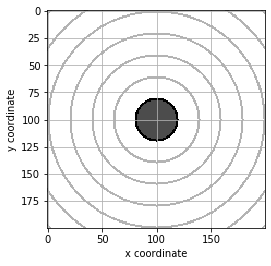

In [8]:
x = arange(-5, 5, 0.05)
y = np.arange(-5, 5, 0.05)
xx, yy = np.meshgrid(x, y)
p = np.array([xx,yy]).T
d = circle(p)
color = render(d)
imshow(color.astype(np.float32), cmap='gray')
grid()
xlabel('x coordinate')
ylabel('y coordinate')
fName = "sdf2d"
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.4f')
plt.show()

In [1]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

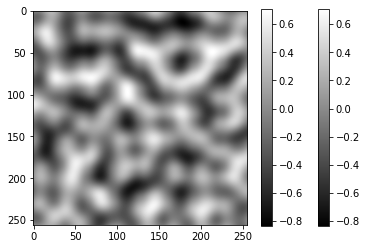

In [166]:
# FROM https://github.com/pvigier/perlin-numpy/blob/master/perlin2d.py

def generate_perlin_noise_2d(shape, res):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3
    
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:  ,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:  ].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:  ,1:  ].repeat(d[0], 0).repeat(d[1], 1)
    # Ramps
    n00 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]  )) * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]  )) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)
        
def generate_fractal_noise_2d(shape, res, octaves=1, persistence=0.5):
    noise = np.zeros(shape)
    frequency = 1
    amplitude = 1
    for _ in range(octaves):
        noise += amplitude * generate_perlin_noise_2d(shape, (frequency*res[0], frequency*res[1]))
        frequency *= 2
        amplitude *= persistence
    return noise
    
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    
    np.random.seed(0)
    noise = generate_perlin_noise_2d((256, 256), (8, 8))
    plt.imshow(noise, cmap='gray', interpolation='lanczos')
    plt.colorbar()
    
#     np.random.seed(0)
#     noise = generate_fractal_noise_2d((256, 256), (8, 8), 5)
#     plt.figure()
#     plt.imshow(noise, cmap='gray', interpolation='lanczos')
    plt.colorbar()
    plt.show()

In [ ]:
getNoise(n):
    

In [182]:
def ground(p):
    return p[:,:,0]+2.5+noise[0,(p[:,:,1]*10).round().astype(int16)]*5

In [183]:
def wall(p):
    return -p[:,:,1]+3

In [184]:
def myMap(p):
    d = minimum(ground(p),wall(p))
    return d

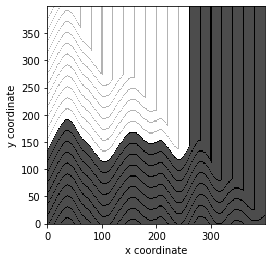

In [189]:
x = arange(-10, 10, 0.05)
y = np.arange(-10, 10, 0.05)
xx, yy = np.meshgrid(x, y)
p = np.array([xx,yy]).T
d = minimum(ground(p),wall(p))
# d = circle(p)
color = render(d)
imshow(color.astype(np.float32), cmap='gray', origin='lower')
# grid()
xlabel('x coordinate')
ylabel('y coordinate')
fName = "sdf2d"
# tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.4f')
plt.show()

In [190]:
from matplotlib.patches import Circle

In [191]:
def draw_circle(ax,x,y,r):
    """
    Draw a circle in axis coordinates
    """

    p = Circle((x, y), r,facecolor='w',fill=False,edgecolor='k')
    ax.add_artist(p)


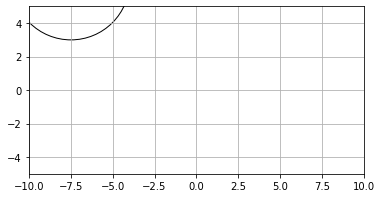

In [201]:
def trace(ax,ro):
    tmin = 0.1
    rd = array([1,0.])
    p = ro
    t = 0.01
    for i in range(100):
        d = myMap(p)
        t += d
        p = ro+t*(rd)
        draw_circle(ax,p[:,:,0],p[:,:,1],d)
        draw_circle(ax,p[:,:,0],p[:,:,1],0.1)
#         print(p)
        if d<tmin:
            break
        
    
ax = plt.gca()
ax.set_aspect(1.)
xlim([-10,10])
ylim([-5,5])
grid()

trace(ax,array([[[-4,6.5]]]))

plt.show()